$ Importing required Libraries $

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


##reading Data & Plotting

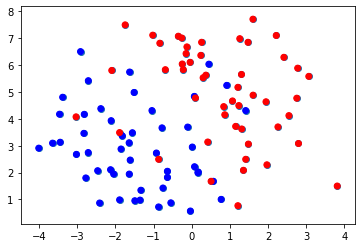

In [2]:
data=np.genfromtxt('x.txt')
label=np.genfromtxt('y.txt').reshape(99,1)
cov=np.cov(data.T)
plt.scatter( data[:,1],data[:,0])
data_labels=np.empty([data.shape[0],3])
data_labels=np.concatenate((data,label),axis=1)
color= ['red' if l == 1 else 'blue' for l in data_labels[:,2]]
plt.scatter(data_labels[:,1], data_labels[:,0], color=color)

##processing data

In [3]:
#class 1 data
dta_pos=data[50:]
#class -1 data
dta_neg=data[:50]

In [4]:
#calculating Covariance Matrix
def cov_m(data):
    return np.cov(data.T)
#calculating Mean Vector
def mean(data):
    return np.mean(data.T,axis=1)

## case (i)

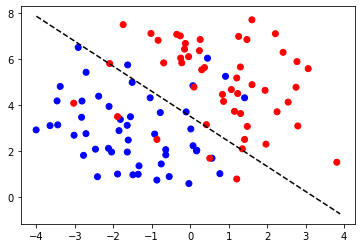

In [6]:
c=np.zeros([2,2])
c[0][0]=c[1][1]=2.74
m1=mean(dta_pos).T
m2=mean(dta_neg).T

W1=(m1-m2)/2.74
b1=-0.5*(np.dot(m1.T,m1)-np.dot(m2.T,m2))/2.74
def boundary1(x2):
    return -1.09*x2+3.5
x1=np.arange(-4,4,0.1)
x2=[boundary1(i) for i in x1]
plt.scatter(data_labels[:,1], data_labels[:,0], color=color)
plt.plot(x1,x2,'k--')

## case (ii)

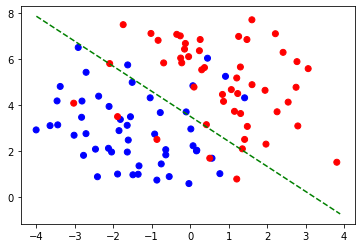

In [9]:
c2=cov_m(dta_pos)
W2=(np.dot(np.linalg.inv(c),(m1-m2)))
b2=-0.5*(np.dot(np.dot(m1.T,np.linalg.inv(c)),m1)-np.dot(np.dot(m2.T,np.linalg.inv(c)),m2))
def boundary2(x2):
    return -1.09*x2+3.5
x1=np.arange(-4,4,0.1)
x2=[boundary2(i) for i in x1]
plt.scatter(data_labels[:,1], data_labels[:,0], color=color)
plt.plot(x1,x2,'g--')

## case (iii)

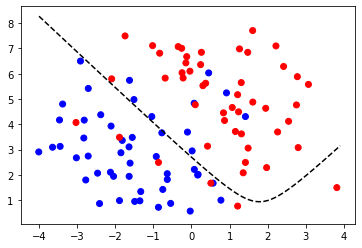

In [13]:
c1_inv=np.linalg.inv(cov_m(dta_pos))
c2_inv=np.linalg.inv(cov_m(dta_neg))
A=0.5*(c2_inv-c1_inv)
B=(np.dot(c1_inv,m1)-np.dot(c2_inv,m2))
det_c1=np.linalg.det(cov_m(dta_pos))
det_c2=np.linalg.det(cov_m(dta_neg))
d=-0.5*((np.log(det_c1/det_c2))+(np.dot(m1.T,np.dot(c1_inv,m1)))-np.dot(m2.T,np.dot(c2_inv,m2)))
def boundary3(x2_3):
    return np.sqrt(2.02*x2_3**2-7.2*x2_3-2.7+10)
x1_3=np.arange(-4,4,0.1)
x2_3=np.arange(0,8,0.1)
x2=[boundary3(i) for i in x1_3]
plt.plot(x1_3,x2,'k--')
plt.scatter(data_labels[:,1], data_labels[:,0], color=color)

